In [186]:
#Importing Dependencies

import pandas as pd
import numpy as np
import requests
import os
from pprint import pprint
import matplotlib.pyplot as plt
import json
import re
from datetime import datetime 
from datetime import time
from pytz import timezone
import pytz

#openings = pd.read_csv("chess_openings.csv")

In [187]:
#Stating Url and Username

url = "https://api.chess.com/pub/player/"
name = input()
%store name

Stored 'name' (str)


In [188]:
# Making folders to save username specific data
path = (f"./graphs/{name}")
time_path = (f"./graphs/{name}/time_based")
opening_path = (f"./graphs/{name}/openings")

try:
    os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)


Creation of the directory ./graphs/pawnofcapitalism failed


In [189]:
# Creating Time graph folder within graphs
try:
    os.makedirs(time_path)
except OSError:
    print ("Creation of the directory %s failed" % time_path)
else:
    print ("Successfully created the directory %s " % time_path)

Creation of the directory ./graphs/pawnofcapitalism/time_based failed


In [190]:
# Creating Opening graph folder within graphs
try:
    os.makedirs(opening_path)
except OSError:
    print ("Creation of the directory %s failed" % opening_path)
else:
    print ("Successfully created the directory %s " % opening_path)

Creation of the directory ./graphs/pawnofcapitalism/openings failed


In [191]:
# For Loop to collect all the months that contain archives (API comes in url form)
query = f"{url}{name}/games/archives"
for queries in query:
    archives = requests.get(query).json()

In [192]:
len(archives['archives'])

4

In [193]:
#Looping to get all the games in all the archives, still sorted by archive 

all_the_games = []

for archive in archives['archives']:
    total_games = requests.get(archive).json()
    all_the_games.append(total_games)

In [194]:
#Finding the number of games in each of archive (needed for For Loop)
number_games = [] 

for x in range(len(archives['archives'])):
    number = len(all_the_games[x]['games'])
    number_games.append(number)

In [195]:
# Getting a useable list of games to For Loop
chess_games = []

for y in range(len(archives['archives'])):
    soup = all_the_games[y]['games']
    chess_games.append(soup)

In [196]:
# Using zipped For Loop to append all games to one list

zipper = zip(range(len(archives['archives'])), number_games)
    
total_games = []
for x, b in zipper:
    tots = chess_games[x]
    for y in range(b):
        total = tots[y]
        total_games.append(total)

len(total_games)

495

In [197]:
# CODE BREAK

In [198]:
#Example result 
# comes in large string format which needs to be further parsed


In [199]:
# Creating fancy For Loop to loop through json data and append data lists

url = []
date = []
time = []
time_control = []
fmt = "%Y.%m.%d %H:%M:%S"
tz = timezone("US/Pacific")

white_name = []
white_rating = []
white_result = []

black_name = []
black_rating = []
black_result = []

eco_code = []
eco_name = []

for i in range(len(total_games)):
    try:
        url1 = total_games[i]['url']
        url.append(url1)
    
        date1 = total_games[i]['pgn'].split('\n')[2].split(" ")[1]
        date1 = date1[:-2]
        date1 = date1[1:]
        date.append(date1)
        
        time1 = total_games[i]['pgn'].split('\n')[12].split(" ")[1]
        time1 = time1[:-2]
        time1 = time1[1:]
    
        if len(time1) == 8: 
            time1 = datetime.strptime(date1 + " " + time1, fmt)
            time2 = pytz.utc.localize(time1, is_dst=None).astimezone(tz)
            time.append(time2.time())
        
        else:
            time.append(None)

        time_c = total_games[i]['time_control']
        time_control.append(time_c)
    
        white1 = total_games[i]['white']['username']
        white_name.append(white1)
    
        rating1 = total_games[i]['white']['rating']
        white_rating.append(rating1)
    
        result1 = total_games[i]['white']['result']
        white_result.append(result1)
    
        black1 = total_games[i]['black']['username']
        black_name.append(black1)
    
        black2 = total_games[i]['black']['rating']
        black_rating.append(black2)
    
        black3 = total_games[i]['black']['result']
        black_result.append(black3)
    
        eco1 = re.sub("\W", "", total_games[i]['pgn'].split('\n')[9].split(" ")[1])
        eco_code.append(eco1)

        try:
            eco2 = total_games[i]['pgn'].split('\n')[10].split("/")[4].split("]")[0]
            eco3 = eco2[:-1]
            eco_name.append(eco3)
        except:
            eco_name.append(None)
            
    except:
        pass

In [200]:
len(eco_name)

495

# Creating fancy For Loop to loop through json data and append data lists

url = []
date = []
time = []
time_control = []
fmt = "%Y.%m.%d %H:%M:%S"
tz = timezone("US/Pacific")

white_name = []
white_rating = []
white_result = []

black_name = []
black_rating = []
black_result = []

eco_code = []
eco_name = []

for i in range(len(total_games)):
    try:
        url1 = total_games[i]['url']
    
        date1 = total_games[i]['pgn'].split('\n')[2].split(" ")[1]
        date1 = date1[:-2]
        date1 = date1[1:]
        
        time1 = total_games[i]['pgn'].split('\n')[12].split(" ")[1]
        time1 = time1[:-2]
        time1 = time1[1:]

        time_c = total_games[i]['time_control']
    
        white1 = total_games[i]['white']['username']
    
        rating1 = total_games[i]['white']['rating']
    
        result1 = total_games[i]['white']['result']
    
        black1 = total_games[i]['black']['username']
    
        black2 = total_games[i]['black']['rating']
    
        black3 = total_games[i]['black']['result']
    
        eco1 = re.sub("\W", "", total_games[i]['pgn'].split('\n')[9].split(" ")[1])

        eco2 = total_games[i]['pgn'].split('\n')[10].split("/")[4].split("]")[0]
        eco3 = eco2[:-1]
        
        pgn1 = len(total_games[i]['pgn'].split("\n")[22].split(" "))
        
        #Massive appending
        
        url.append(url1)
        date.append(date1)
        if len(time1) == 8: 
            time1 = datetime.strptime(date1 + " " + time1, fmt)
            time2 = pytz.utc.localize(time1, is_dst=None).astimezone(tz)
            time.append(time2.time())
        time_control.append(time_c)
        white_name.append(white1)
        white_rating.append(rating1)
        white_result.append(result1)
        black_name.append(black1)
        black_rating.append(black2)
        black_result.append(black3)
        eco_code.append(eco1)
        eco_name.append(eco3)
        pgn_number.append(pgn1)
            
    except:
        pass

In [201]:
# Looking for length of "pgn" annotation per games to use in For Loop
pgn_number = []
for i in range(len(total_games)):
    try:
        pgn1 = len(total_games[i]['pgn'].split("\n")[22].split(" "))
        pgn_number.append(pgn1)
    except:
        pgn_number.append(None)

In [202]:
# Zip together length of total_games, and the number of pgn per game

zipper = zip(range(len(total_games)), pgn_number)

pgn_score = []
pgn = []

# Complicated For Loop which only appends the 1st, and 2nd element, 
# while skipping the 3rd and 4th

for y, z in zipper:
    total = total_games[y]
    x = 0
    pgn = []
    
    try:
        for i in range(z):
        
            try:
                x = x + 1
        
                if x == 1:
                    pgn1 = total['pgn'].split("\n")[22].split(" ")[i]
                    pgn.append(pgn1)
               
                elif x == 2:
                    pgn2 = total['pgn'].split("\n")[22].split(" ")[i]
                    pgn.append(pgn2)
    
                elif x == 3:
                    pass
    
                else:
                    x = 0
        
            except:
                pass
            
        pgn_score.append(pgn)
    except:
        pgn_score.append(None)

In [203]:
white_bool = []

for x in range(len(white_result)):
    if white_result[x] == "win":
        y = 1
        white_bool.append(y)
    elif (white_result[x] == "resigned" or white_result[x] == "timeout" or white_result[x] == "checkmated" or white_result[x] == "abandoned"):
        y = 0
        white_bool.append(y)
    else: 
        y = 0.5
        white_bool.append(y)

In [204]:
black_bool = []

for x in range(len(white_result)):
    if black_result[x] == "win":
        y = 1
        black_bool.append(y)
    elif (black_result[x] == "resigned" or black_result[x] == "timeout" or black_result[x] == "checkmated" or black_result[x] == "abandoned"):
        y = 0
        black_bool.append(y)
    else: 
        y = 0.5
        black_bool.append(y)

In [205]:
# Turning pgn into single string for SQL to parse

pgn_string = []
string1 = ""

for x in range(len(pgn_score)):
    string1 = ""
    try:
        pgn1 = pgn_score[x]
       
        for pgn in pgn1:
            string1 += pgn + " "
        
        pgn_string.append(string1)
    
    except:
        pgn_string.append(None)
        

In [206]:
# Checking length of arrays for DF
print(len(pgn_string), len(black_bool), len(total_games), len(pgn_score), len(eco_code), len(date), len(time), len(time_control), len(eco_code), len(url), len(eco_name))

495 495 495 495 495 495 495 495 495 495 495


In [207]:
# Creating a master dataframe on the data I collected
total_games_df = {"date": date, "time": time, "time_control": time_control, "white_name": white_name, "white_rating": white_rating,
                 "white_result": white_result, "white_bool": white_bool, "black_name": black_name, "black_rating": black_rating, 
                 "black_result": black_result, "black_bool": black_bool, "eco_code": eco_code, "eco_name": eco_name, "pgn_score": pgn_score, "pgn_string": pgn_string, "url": url}

the_master_df = pd.DataFrame(total_games_df)
the_master_df.head()

,date,time,time_control,white_name,white_rating,white_result,white_bool,black_name,black_rating,black_result,black_bool,eco_code,eco_name,pgn_score,pgn_string,url
0,2020.09.02,07:58:42,1/259200,pawnofcapitalism,1200,timeout,0.0,ultimatekingkiller,1200,win,1.0,B07,Pirc-Defense-Maroczy-Defense,"[1., e4, 1..., e5, 2., d4, 2..., d6, 0-1]",1. e4 1... e5 2. d4 2... d6 0-1,https://www.chess.com/game/daily/277777820
1,2020.11.01,13:33:26,600,Fireshark36,1038,abandoned,0.0,pawnofcapitalism,1362,win,1.0,A00,Ware-Opening-1...e5,"[1., a4, 1..., e5, 0-1]",1. a4 1... e5 0-1,https://www.chess.com/live/game/5671194468
2,2020.11.01,13:35:16,600,pawnofcapitalism,1208,resigned,0.0,stepans,1344,win,1.0,B06,Modern-Defense-Geller-System,"[1., e4, 1..., g6, 2., d4, 2..., Bg7, 3., Nf3,...",1. e4 1... g6 2. d4 2... Bg7 3. Nf3 3... d6 4....,https://www.chess.com/live/game/5671201721
3,2020.11.01,13:54:14,600,fooman1326,1202,resigned,0.0,pawnofcapitalism,1315,win,1.0,B01,Scandinavian-Defense,"[1., e4, 1..., d5, 2., d3, 2..., Nf6, 3., e5, ...",1. e4 1... d5 2. d3 2... Nf6 3. e5 3... Nfd7 4...,https://www.chess.com/live/game/5671281431
4,2020.11.01,14:02:55,600,pawnofcapitalism,1234,checkmated,0.0,HappyGuyCZE,1321,win,1.0,C21,Center-Game,"[1., e4, 1..., e5, 2., d4, 2..., Nf6, 3., Nc3,...",1. e4 1... e5 2. d4 2... Nf6 3. Nc3 3... Bb4 4...,https://www.chess.com/live/game/5671317106


In [208]:
# Changing datatypes
the_master_df['date'] = pd.to_datetime(the_master_df['date'])
the_master_df = the_master_df.dropna()
the_master_df['white_rating'] = the_master_df['white_rating'].astype(int)
the_master_df['black_rating'] = the_master_df['black_rating'].astype(int)

#No no no
#the_master_df['white_bool'] = the_master_df['white_bool'].astype(int)
#the_master_df['black_bool'] = the_master_df['black_bool'].astype(int)

In [209]:
the_master_df.to_csv(f"csv_files/{name}.csv", index=False)

In [210]:
# BREAK

In [211]:
%run SQL.ipynb

Stored 'white_openings' (DataFrame)
Stored 'white_e4' (DataFrame)
Stored 'white_d4' (DataFrame)
Stored 'white_c4' (DataFrame)
Stored 'white_Nf3' (DataFrame)
Stored 'first_move_for_black' (DataFrame)
Stored 'black_against_e4' (DataFrame)
Stored 'black_against_d4' (DataFrame)
Stored 'black_sicilian' (DataFrame)
Stored 'black_italian' (DataFrame)
Stored 'black_caro' (DataFrame)
Stored 'black_french' (DataFrame)
Stored 'black_indian' (DataFrame)
Stored 'black_queens' (DataFrame)


In [212]:
# Analysis
the_master_df['time_control'].value_counts()

600         399
1800         51
300          39
180           3
300+5         2
1/259200      1
Name: time_control, dtype: int64

In [213]:
#More Analysis
the_master_df['white_result'].value_counts()

win             243
resigned        131
checkmated       75
timeout          15
stalemate        10
abandoned         9
repetition        8
insufficient      2
agreed            2
Name: white_result, dtype: int64

In [214]:
#Reset username here!
%store -r name
#Creating dataframes for each color

white_df = the_master_df.where(the_master_df['white_name'] == name)
white_df = white_df.dropna()
black_df = the_master_df.where(the_master_df['black_name'] == name)
black_df = black_df.dropna()

In [215]:
# Finding ratio of results for each color

#white_list = the_master_df['white_bool'].where(the_master_df['white_name'] == 'jsteele619')
#black_list = the_master_df['black_bool'].where(the_master_df['black_name'] == 'jsteele619')
#black_list[0]/black_list.sum()
#black_list[1]/black_list.sum()
#black_list[0.5]/black_list.sum()
#white_list[0]/white_list.sum()
#white_list[1]/white_list.sum()
#white_list[0.5]/white_list.sum()

In [216]:
# Creating DF for each time control
white_df5 = the_master_df.where(the_master_df['white_name'] == name).where(the_master_df['time_control'] == '300')
black_df5 = the_master_df.where(the_master_df['black_name'] == name).where(the_master_df['time_control'] == '300')
white_df10 = the_master_df.where(the_master_df['white_name'] == name).where(the_master_df['time_control'] == '600')
black_df10 = the_master_df.where(the_master_df['black_name'] == name).where(the_master_df['time_control'] == '600')
white_df1 = the_master_df.where(the_master_df['white_name'] == name).where(the_master_df['time_control'] == '60')
black_df1 = the_master_df.where(the_master_df['black_name'] == name).where(the_master_df['time_control'] == '60')
white_df3 = the_master_df.where(the_master_df['white_name'] == name).where(the_master_df['time_control'] == '180')
black_df3 = the_master_df.where(the_master_df['black_name'] == name).where(the_master_df['time_control'] == '180')

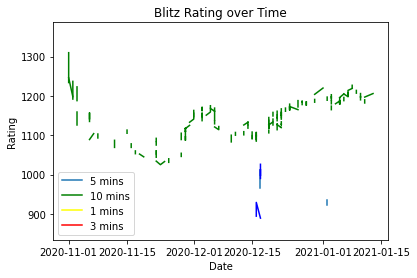

In [217]:
# Graphing Blitz Rating results by time control
fig = plt.figure()
ax = plt.axes()

ax.plot(white_df5["date"], white_df5["white_rating"], label="5 mins")
ax.plot(white_df10["date"], white_df10["white_rating"], label="10 mins", color='green')
ax.plot(white_df1["date"], white_df1["white_rating"], label="1 mins", color='yellow')
ax.plot(white_df3["date"], white_df3["white_rating"], label="3 mins", color='red')
ax.plot(black_df5["date"], black_df5["black_rating"], color='blue')
ax.plot(black_df10["date"], black_df10["black_rating"], color='green')
ax.plot(black_df1["date"], black_df1["black_rating"], color='gold')
ax.plot(black_df3["date"], black_df3["black_rating"], color='red')


ax.legend(loc="best")
plt.title("Blitz Rating over Time")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.savefig(f"graphs/{name}/time_based/time_control_blitz_rating_over_time.png")
plt.show()

In [218]:
#Getting the bins for graphing
white_graph_time = []
black_graph_time = []

for time in white_df['time']:
    white_graph_time.append(time.hour)  
    
for time in black_df['time']:
    black_graph_time.append(time.hour)
    
#Getting the list of bool results for graphing
    
white_graph_bool = []
black_graph_bool = []

for bools in white_df['white_bool']:
    white_graph_bool.append(bools)  
    
for bools in black_df['black_bool']:
    black_graph_bool.append(bools)
    
#Combining lists

big_graph_time = white_graph_time + black_graph_time
big_graph_bool = white_graph_bool + black_graph_bool

print(f'Lengths of both lists: {len(big_graph_bool)} and {len(big_graph_time)}')

Lengths of both lists: 495 and 495


In [219]:
zipped = {"big_graph_time": big_graph_time, "big_graph_bool": big_graph_bool}
zips = pd.DataFrame(zipped)

In [220]:
#Creating list of frequency per result, per hour:
zips1 = zips.where(zips['big_graph_bool'] == 1.0)
zips5 = zips.where(zips['big_graph_bool'] == 0.5)
zips0 = zips.where(zips['big_graph_bool'] == 0.0)
zips1 = zips1.dropna()
zips0 = zips0.dropna()
zips5 = zips5.dropna()

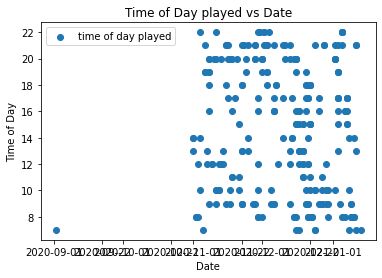

In [221]:
# Plotting Time of Day vs Date
fig = plt.figure()
ax = plt.axes()

plt.scatter(white_df["date"], white_graph_time, label="time of day played")

ax.legend(loc="best")

plt.title("Time of Day played vs Date")
plt.xlabel("Date")
plt.ylabel("Time of Day")
plt.savefig(f"graphs/{name}/time_based/time_of_day_played_vs_date.png")
plt.show()

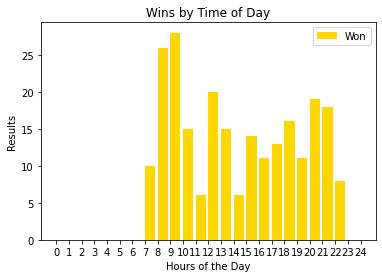

In [222]:
#Graphing wins per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips1['big_graph_time'], bins, width=0.8, label='Won', color='gold')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Wins by Time of Day")
plt.savefig(f"graphs/{name}/time_based/wins_by_time_of_day.png")

plt.show()

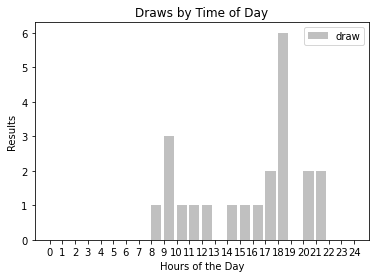

In [223]:
#Graphing draws per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips5['big_graph_time'], bins, width=0.8, label='draw', color='silver')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Draws by Time of Day")
plt.savefig(f"graphs/{name}/time_based/draw_by_time_of_day.png")
plt.show()

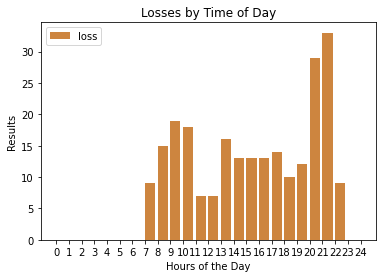

In [224]:
#Graphing losses per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips0['big_graph_time'], bins, width=0.8, label='loss', color='#CD853F')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Losses by Time of Day")
plt.savefig(f"graphs/{name}/time_based/losses_by_time_of_day.png")

plt.show()

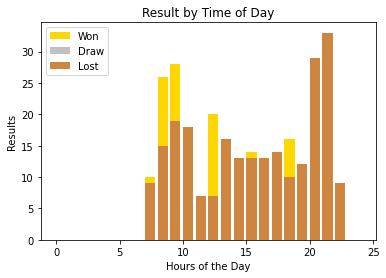

In [225]:
# Comparison Wins and Losses

N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips1['big_graph_time'], bins, width=0.8, label='Won', color='gold', stacked=True)
plt.hist(zips5['big_graph_time'], bins, width=0.8, label='Draw', color='silver', stacked=True)
plt.hist(zips0['big_graph_time'], bins, width=0.8, label='Lost', color='#CD853F', stacked=True)

plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Result by Time of Day")
plt.savefig(f"graphs/{name}/time_based/comparison_of_time_of_day.png")

plt.show()

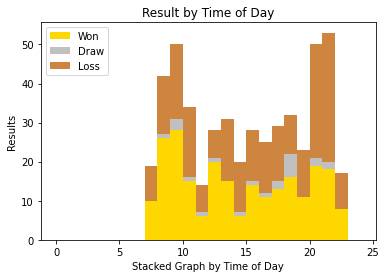

In [226]:
#The Stacked Graph by hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist([zips1['big_graph_time'], zips5['big_graph_time'], zips0['big_graph_time']], bins, color=['gold', 'silver', '#CD853F'], label=['Won', 'Draw', 'Loss'], stacked=True)

plt.ylabel("Results")
plt.xlabel("Stacked Graph by Time of Day")
plt.legend(loc="best")
plt.title("Result by Time of Day")
plt.savefig(f"graphs/{name}/time_based/stacked_by_time_of_day.png")

plt.show()

In [227]:
#Importing saved SQL search from other jupyter notebook

%store -r white_e4
%store -r white_d4
%store -r white_c4
%store -r white_Nf3
%store -r white_openings
%store -r first_move_for_black
%store -r black_against_e4
%store -r black_against_d4
%store -r black_sicilian
%store -r black_italian
%store -r black_caro
%store -r black_french
%store -r black_indian
%store -r black_queens

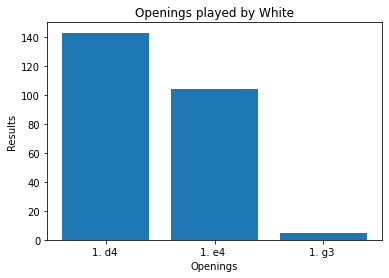

In [228]:
#Graphing the Opening Moves played

plt.bar(white_openings['sub'].head(4), white_openings['count'].head(6))
plt.ylabel("Results")
plt.xlabel("Openings")

plt.title("Openings played by White")
plt.savefig(f"graphs/{name}/openings/{name}_as_white_openings.png")

plt.show()

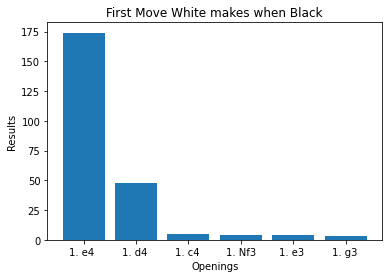

In [229]:
#Graphing the Opening Moves played

plt.bar(first_move_for_black['sub'].head(6), first_move_for_black['count'].head(6))
plt.ylabel("Results")
plt.xlabel("Openings")

plt.title("First Move White makes when Black")
plt.savefig(f"graphs/{name}/openings/white_first_move_when_{name}_black.png")

plt.show()

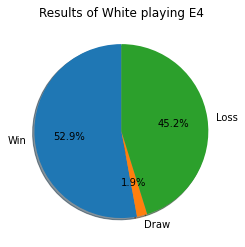

In [230]:
#Results with White playing 1. e4

fig1, ax1 = plt.subplots()
ax1.pie(white_e4['count'], labels=['Win','Draw','Loss'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of White playing E4")
plt.savefig(f"graphs/{name}/openings/{name}_as_white_playing_e4.png")
plt.show()

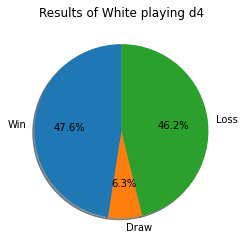

In [231]:
#Results with White playing 1. d4

labels = white_d4['white_bool']

fig1, ax1 = plt.subplots()
ax1.pie(white_d4['count'], labels=['Win','Draw','Loss'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of White playing d4")
plt.savefig(f"graphs/{name}/openings/{name}_as_white_playing_d4.png")
plt.show()

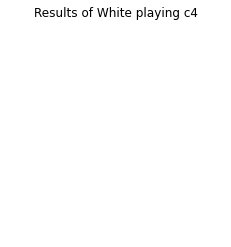

In [233]:
#Results with White playing 1. c4
labels = white_c4['white_bool']

fig1, ax1 = plt.subplots()
ax1.pie(white_c4['count'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of White playing c4")
plt.savefig(f"graphs/{name}/openings/{name}_as_white_playing_c4.png")
plt.show()

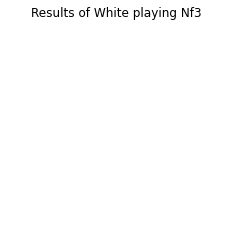

In [235]:
#Results with White playing 1. Nf3
labels = white_Nf3['white_bool']

fig1, ax1 = plt.subplots()
ax1.pie(white_Nf3['count'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of White playing Nf3")
plt.savefig(f"graphs/{name}/openings/{name}_as_white_playing_Nf3.png")
plt.show()

In [236]:
# Creating Function for Labels

def label_e4(string):
    if string == "1. e4 1... c5 2":
        name = 'Sicilian'
    elif string == '1. e4 1... e5 2':
        name = 'Italian Game'
    elif string == '1. e4 1... c6 2':
        name = 'Caro-Kann'
    elif string == '1. e4 1... e6 2':
        name = 'French'
    elif string == '1. e4 1... Nf6 ':
        name = "Alekhine's"
    elif string == "1. e4 1... b6 2":
        name = "Owen's Defense"
    elif string == "1. e4 1... g6 2":
        name = 'Pirc'
    elif string == "1. e4 1... d6 2":
        name = 'Pirc'
    elif string == "1. e4 1... d5 2":
        name = "Scandinavian"
    elif string == "1. e4 1... Nc6 ":
        name = "Nimzowitsch"
    else:
        name = "Other"
    return name


def label_d4(string):
    if string == "1. d4 1... d5 2":
        name = "Queen's Game"
    elif string == '1. d4 1... Nf6 ':
        name = 'Indian (Nf6)'
    elif string == '1. d4 1... f5 2':
        name = 'Dutch'
    elif string == '1. d4 1... e6 2':
        name = 'French Invitation'
    elif string == '1. d4 1... c5 2':
        name = "Benoni"
    elif string == "1. d4 1... g6 2":
        name = 'Indian Game'
    elif string == "1. e4 1... g6 2":
        name = 'Pirc'
    else:
        name = "Other"
    return name

black_e4_names = []
black_d4_names = []

for x in range(len(black_against_e4['sub'])):
    name = label_e4(black_against_e4['sub'][x])
    black_e4_names.append(name)

for x in range(len(black_against_d4['sub'])):
    name = label_d4(black_against_d4['sub'][x])
    black_d4_names.append(name)

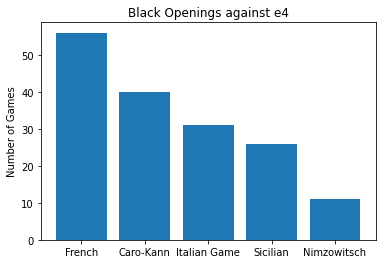

In [237]:
#Reset username here!
%store -r name

# Number of games as Black against e4 per Opening

plt.bar(black_e4_names[:5], black_against_e4['count'].head(5))
plt.ylabel("Number of Games")


plt.title("Black Openings against e4")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_against_e4.png")

plt.show()

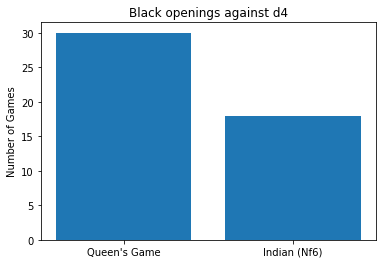

In [238]:
# Number of games as Black against d4 per Opening

plt.bar(black_d4_names[:4], black_against_d4['count'].head(4))
plt.ylabel("Number of Games")
#plt.xlabel("Openings")

plt.title("Black openings against d4")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_against_d4.png")

plt.show()

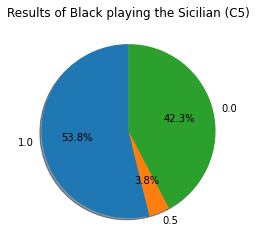

In [239]:
#Results with Black with Sicilian

fig1, ax1 = plt.subplots()
ax1.pie(black_sicilian['count'], labels=black_sicilian['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing the Sicilian (C5)")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_sicilian_results.png")
plt.show()

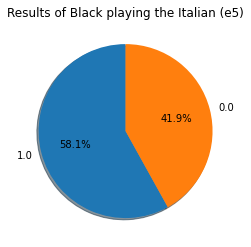

In [240]:
#Black Italian Results

fig1, ax1 = plt.subplots()
ax1.pie(black_italian['count'], labels=black_italian['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing the Italian (e5)")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_e5_results.png")
plt.show()

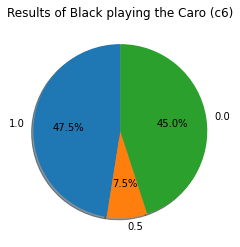

In [241]:
#Black Caro-Kann Results

fig1, ax1 = plt.subplots()
ax1.pie(black_caro['count'], labels=black_caro['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing the Caro (c6)")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_caro_results.png")
plt.show()

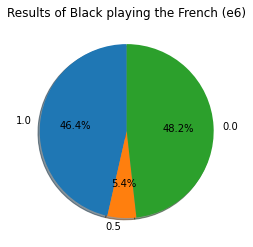

In [242]:
#Black French Results

fig1, ax1 = plt.subplots()
ax1.pie(black_french['count'], labels=black_french['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing the French (e6)")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_french_results.png")
plt.show()

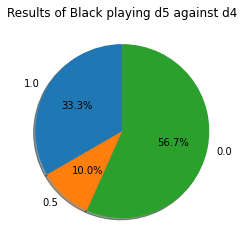

In [243]:
#Black Queens Game Results

fig1, ax1 = plt.subplots()
ax1.pie(black_queens['count'], labels=black_queens['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing d5 against d4")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_d5_results.png")
plt.show()

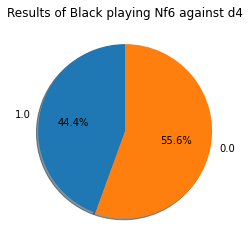

In [244]:
#Black's Nf6 Results

fig1, ax1 = plt.subplots()
ax1.pie(black_indian['count'], labels=black_indian['black_bool'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Results of Black playing Nf6 against d4")
plt.savefig(f"graphs/{name}/openings/{name}_as_black_playing_Nf6_results.png")
plt.show()